In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
pth = r"D:\GIT\Challenge\bike_share_project\sharing\artifact\data_ingestion\2022-07-14-06-08-15\ingested_data\train\hours.csv"
df = pd.read_csv(pth)
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,3,1,6,10,0,5,1,1,0.90,0.8333,0.39,0.2985,32,139,171
1,2,0,4,21,0,2,1,1,0.62,0.5909,0.78,0.2836,33,162,195
2,3,1,7,1,0,6,0,2,0.70,0.6515,0.51,0.1045,13,105,118
3,3,1,6,16,0,6,0,1,0.90,0.7879,0.29,0.1642,109,264,373
4,4,1,11,1,0,3,1,1,0.24,0.2121,0.60,0.2985,2,10,12


In [4]:
df.shape

(13903, 15)

In [5]:
x,y = df.drop(columns=["count"], axis=1), df['count']

In [6]:
x.shape

(13903, 14)

In [7]:
y.shape

(13903,)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      13903 non-null  int64  
 1   year        13903 non-null  int64  
 2   month       13903 non-null  int64  
 3   hour        13903 non-null  int64  
 4   holiday     13903 non-null  int64  
 5   weekday     13903 non-null  int64  
 6   workingday  13903 non-null  int64  
 7   weather     13903 non-null  int64  
 8   temp        13903 non-null  float64
 9   atemp       13903 non-null  float64
 10  humidity    13903 non-null  float64
 11  windspeed   13903 non-null  float64
 12  casual      13903 non-null  int64  
 13  registered  13903 non-null  int64  
 14  count       13903 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 1.6 MB


In [9]:
df.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,3,1,6,10,0,5,1,1,0.90,0.8333,0.39,0.2985,32,139,171
1,2,0,4,21,0,2,1,1,0.62,0.5909,0.78,0.2836,33,162,195
2,3,1,7,1,0,6,0,2,0.70,0.6515,0.51,0.1045,13,105,118
3,3,1,6,16,0,6,0,1,0.90,0.7879,0.29,0.1642,109,264,373
4,4,1,11,1,0,3,1,1,0.24,0.2121,0.60,0.2985,2,10,12


In [10]:
numerical_cols = x.drop(columns=['season', 'year', 'month', 'hour', 'holiday','weekday', 'workingday', 'weather'],axis =1)

In [11]:
numerical_cols

,temp,atemp,humidity,windspeed,casual,registered
0,0.90,0.8333,0.39,0.2985,32,139
1,0.62,0.5909,0.78,0.2836,33,162
2,0.70,0.6515,0.51,0.1045,13,105
3,0.90,0.7879,0.29,0.1642,109,264
4,0.24,0.2121,0.60,0.2985,2,10
...,...,...,...,...,...,...
13898,0.42,0.4242,0.58,0.3582,30,266
13899,0.72,0.6667,0.54,0.1940,2,5
13900,0.60,0.5000,1.00,0.0896,7,27
13901,0.68,0.6364,0.79,0.1940,54,217


In [12]:
si = SimpleImputer(strategy="median")

In [13]:
si.fit_transform(numerical_cols)

array([[9.000e-01, 8.333e-01, 3.900e-01, 2.985e-01, 3.200e+01, 1.390e+02],
       [6.200e-01, 5.909e-01, 7.800e-01, 2.836e-01, 3.300e+01, 1.620e+02],
       [7.000e-01, 6.515e-01, 5.100e-01, 1.045e-01, 1.300e+01, 1.050e+02],
       ...,
       [6.000e-01, 5.000e-01, 1.000e+00, 8.960e-02, 7.000e+00, 2.700e+01],
       [6.800e-01, 6.364e-01, 7.900e-01, 1.940e-01, 5.400e+01, 2.170e+02],
       [7.400e-01, 6.667e-01, 4.800e-01, 1.343e-01, 6.300e+01, 2.720e+02]])

In [14]:
si.transform(numerical_cols)

array([[9.000e-01, 8.333e-01, 3.900e-01, 2.985e-01, 3.200e+01, 1.390e+02],
       [6.200e-01, 5.909e-01, 7.800e-01, 2.836e-01, 3.300e+01, 1.620e+02],
       [7.000e-01, 6.515e-01, 5.100e-01, 1.045e-01, 1.300e+01, 1.050e+02],
       ...,
       [6.000e-01, 5.000e-01, 1.000e+00, 8.960e-02, 7.000e+00, 2.700e+01],
       [6.800e-01, 6.364e-01, 7.900e-01, 1.940e-01, 5.400e+01, 2.170e+02],
       [7.400e-01, 6.667e-01, 4.800e-01, 1.343e-01, 6.300e+01, 2.720e+02]])

In [15]:
si.feature_names_in_

array(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype=object)

In [16]:
si.statistics_

array([  0.5   ,   0.4848,   0.62  ,   0.194 ,  16.    , 115.    ])

In [17]:
categorical_cols = df.drop(columns=['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count'], axis=1)
categorical_cols

,season,year,month,hour,holiday,weekday,workingday,weather
0,3,1,6,10,0,5,1,1
1,2,0,4,21,0,2,1,1
2,3,1,7,1,0,6,0,2
3,3,1,6,16,0,6,0,1
4,4,1,11,1,0,3,1,1
...,...,...,...,...,...,...,...,...
13898,2,0,5,19,0,3,1,1
13899,3,1,7,3,0,4,1,1
13900,4,0,9,13,0,5,1,3
13901,3,1,8,9,0,6,0,1


In [18]:
si = SimpleImputer(strategy="most_frequent")

In [19]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaling', StandardScaler())
])

In [20]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ohe',OneHotEncoder(sparse=False)),
    ('scaling', StandardScaler(with_mean=False))
])

In [21]:
cat_cols =  ['season', 'year', 'month', 'hour', 'holiday','weekday', 'workingday', 'weather']
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered']

In [22]:
preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
])

In [23]:
train_df = preprocessing.fit_transform(df)

In [24]:
test_pth = r"D:\GIT\Challenge\bike_share_project\sharing\artifact\data_ingestion\2022-07-14-06-08-15\ingested_data\test\hours.csv"
test_df = pd.read_csv(test_pth)
test_df.shape

(3476, 15)

In [25]:
test_arr =preprocessing.transform(test_df)

In [26]:
import pickle

In [27]:
pickle.dump(preprocessing, open('model.pkl', 'wb'))

In [28]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [29]:
pickled_model.transform(test_df)

array([[-1.43552307, -1.178019  ,  0.33552317, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94900405,  0.93240009,  0.33552317, ...,  2.27934995,
         0.        ,  0.        ],
       [-0.81347252, -0.91399901,  0.69947563, ...,  2.27934995,
         0.        ,  0.        ],
       ...,
       [-1.1244978 , -1.08981892, -0.0804225 , ...,  2.27934995,
         0.        ,  0.        ],
       [-2.05757363, -1.96891842, -0.44437496, ...,  0.        ,
         0.        ,  0.        ],
       [-0.39877215, -0.29891949,  0.75146884, ...,  2.27934995,
         0.        ,  0.        ]])

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [31]:
lr = LinearRegression()

In [32]:
X = train_df

In [33]:
y = np.array(df['count'])

In [34]:
lr.fit(X,y)

LinearRegression()

In [35]:
lr.fit_intercept

True

In [36]:
lr.coef_

array([ 2.30216771e-13, -1.06581410e-13, -5.68434189e-14, -4.97379915e-14,
        4.92056933e+01,  1.50740554e+02, -4.06192414e-01, -4.11298345e-01,
       -4.13420275e-01, -4.04528735e-01, -5.00635879e+00, -5.00635879e+00,
        2.18011101e-01,  2.10023346e-01,  2.19457634e-01,  2.16291409e-01,
        2.21893814e-01,  2.16636915e-01,  2.20133604e-01,  2.21810456e-01,
        2.16981633e-01,  2.18096575e-01,  2.15163030e-01,  2.20806573e-01,
        3.84448718e-02,  3.80663415e-02,  3.72630387e-02,  3.77153829e-02,
        3.78753877e-02,  3.81297405e-02,  3.84448718e-02,  3.80028167e-02,
        3.80663415e-02,  3.86636440e-02,  3.85388129e-02,  3.85700659e-02,
        3.80980566e-02,  3.86947766e-02,  3.78753877e-02,  3.81297405e-02,
        3.86324814e-02,  3.86636440e-02,  3.86636440e-02,  3.81297405e-02,
        3.81930144e-02,  3.86324814e-02,  3.80028167e-02,  3.80663415e-02,
       -1.14976885e+00,  6.93215110e-01, -9.76618846e-01, -4.79490126e+00,
       -4.76558885e+00, -

In [37]:
lr.intercept_

217.05790114692002

In [38]:
y_hat = lr.predict(X)

In [39]:
import matplotlib.pyplot as plt

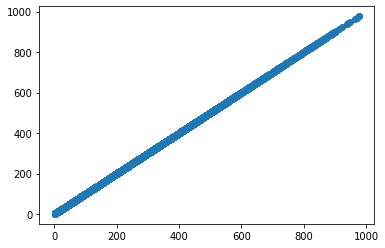

In [40]:
plt.plot(y, y_hat,"o")


In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y,y_hat)

1.0

In [43]:
yhat_test = lr.predict(test_arr)

In [44]:
y_test = np.array(test_df['count'])

In [45]:
r2_score(y_test, yhat_test)

1.0